## Title: History of Olympic

### Team 3

- Krishna Agarwal
- Tejendra Naga Pavan Gottumukalla
- Nikitha Patel

## Introduction

The Olympics are a very integral platform for a sportsman and various countries to showcase their talents, resources, hard-work and spirits associated with their sport. Whenever the Olympics takes place, there are winners and losers, also we get to experience the sportsmanship spirit of the various contestants. The dataset that we have chosen has the various details regarding the athletes, coaches, countries and also the event they have participated in along with the genders of the athletes over the years. We have sourced the dataset from Kaggle, which is an open-sourced community for sharing, competing and learning on the topics of data science.

## Dataset

This dataset has been open-sourced from the Kaggle community. It contains the details on all the Olympic participation from Athens in 1896 to Rio in 2016. The dataset has the details pertaining to the athlete’s name, gender, age, nationality, team along with the details of where, when and the session of Olympic games held.

The data is structured and the file 'athlete_events.csv' has 15 columns, namely:
1. ID - Unique number for each athlete
2. Name - Athlete's name
3. Sex - M or F
4. Age - Integer
5. Height - In centimeters
6. Weight - In kilograms
7. Team - Team name
8. NOC - National Olympic Committee 3-letter code
9. Games - Year and season
10. Year - Integer
11. Season - Summer or Winter
12. City - Host city
13. Sport - Sport
14. Event - Event
15. Medal - Gold, Silver, Bronze, or NA

The 'noc_regions.cvs' file contains the details about the NOC, region and any notes on them.

It is a CC0:Public Domain certified dataset, which allows us the access it without copyright issues.

The dataset can be found at: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv

## Guiding Questions

The questions that we would want to get answers for as a team are:

1. The evolution of performance and participation of women athletes over time and how the proportion of men vs women athletes has changed over the course.
- Previously, it was very hard for women to be able to perform at the Olympics but over time this has changed with many events and sports being specifically held for the women. We would like to understand how this graph has changed over the years and how it affected the overall performance of the countries participating in the Olympics.

2. How has the mean BMI varied for the gymnasts over the years?
- Competing in gymnastics has gotten difficult as the years passed by with new records being set. This would have required a change to the athlete’s health and other factors. We try to find out how the BMI of the athletes has changed over the years to keep up with the changing times.

3. How was the performance of various countries impacted due to the separation of winter and summer sessions?
- Due to changes where the winter and summer session were getting held at different times after 1992. The countries had a far lesser time preparing for it and our aim is to uncover how it has impacted their performance over the years.


### Imports for the project

In [1]:
import numpy as np
import pandas as pd
import datetime as dt


import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly as plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
%matplotlib inline

py.init_notebook_mode(connected=True)



from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import calendar
import plotly.graph_objects as go

### Reading the dataset, general information about the data and merging the dataframes.

In [2]:
ath_data = pd.read_csv('athlete_events.csv')
region = pd.read_csv('noc_regions.csv')

In [3]:
ath_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### To collect the statistical information about the various columns in dataset, we use .describe()

In [4]:
ath_data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


### For understanding the datatype, null or not, and other information we use .info()

In [5]:
ath_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [7]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


### Since the NOC is the key in both the dataframes, we can merge using the key

In [8]:
complete_data = pd.merge(ath_data,region, on = "NOC", how = 'left')

In [9]:
complete_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


## Guiding Question-1:

The evolution of performance and participation of women athletes over time
and how the proportion of men vs women athletes has changed over the course.

    o Previously, it was very hard for women to be able to perform at the
    Olympics but over time this has changed with many events and
    sports being specifically held for the women. We would like to
    understand how this graph has changed over the years and how it
    affected the overall performance of the countries participating in the
    Olympics.

In [10]:
#For this we first filter a dataset consisting of only women athletes over he yars and the seasons (Summer and Winter)

women_ath = complete_data[(complete_data.Sex=='F')]

In [11]:
women_ath.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


Text(0.5, 1.0, 'Number of Women athletes over the years')

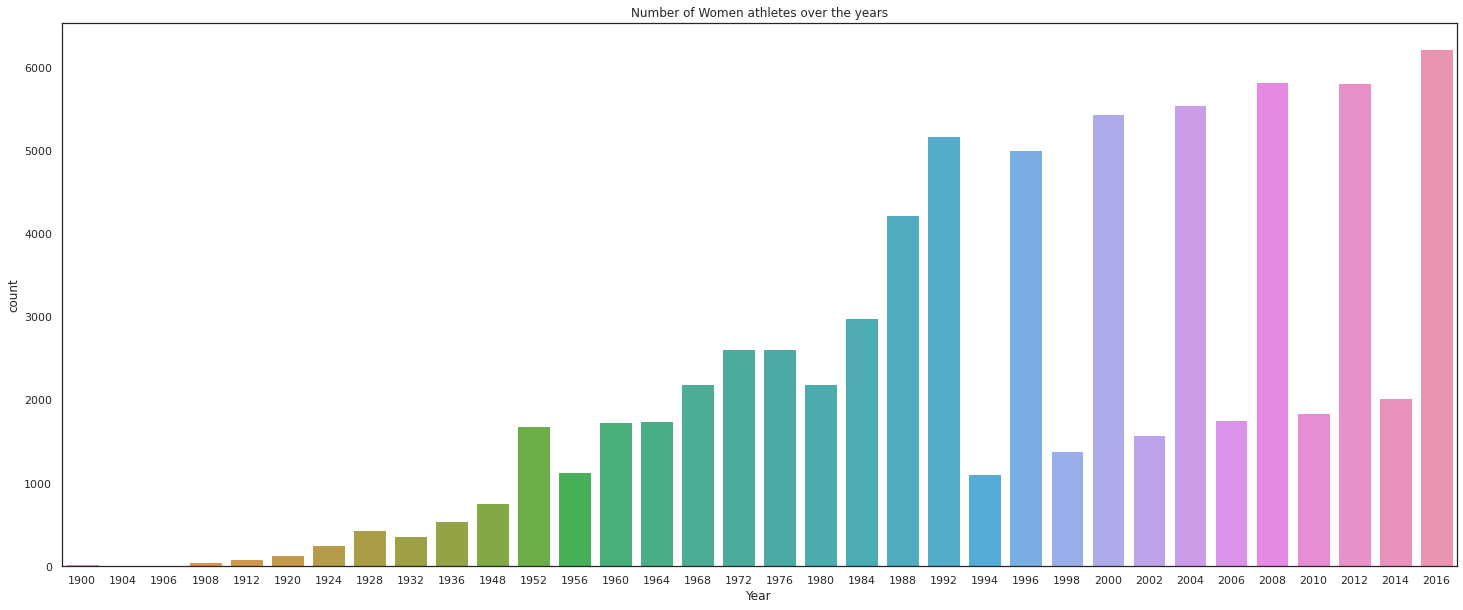

In [12]:
sns.set(style='white')
plt.figure(figsize=(25,10))
sns.countplot(x='Year',data=women_ath)

plt.title("Number of Women athletes over the years")



From the above graph we can say that after the division of winter and summer seasons after 1992, the women participants in subesquent winter editions have been less compared to their summer counterparts.

Also, we see an increasing growth among the women athletes over the years where it was almost non-existent in 1990 to around 6000 participants in 2016

In [13]:
#Number of women participants in 1900

women_ath['ID'].loc[women_ath['Year']==1900].count()

33

In [14]:
#Number of women athletes in 2016
women_ath['ID'].loc[women_ath['Year']==2016].count()

6223

The number of female athletes has undergone a tremendous change over the years

Text(0.5, 1.0, 'Variation of Age for Female Athletes over time')

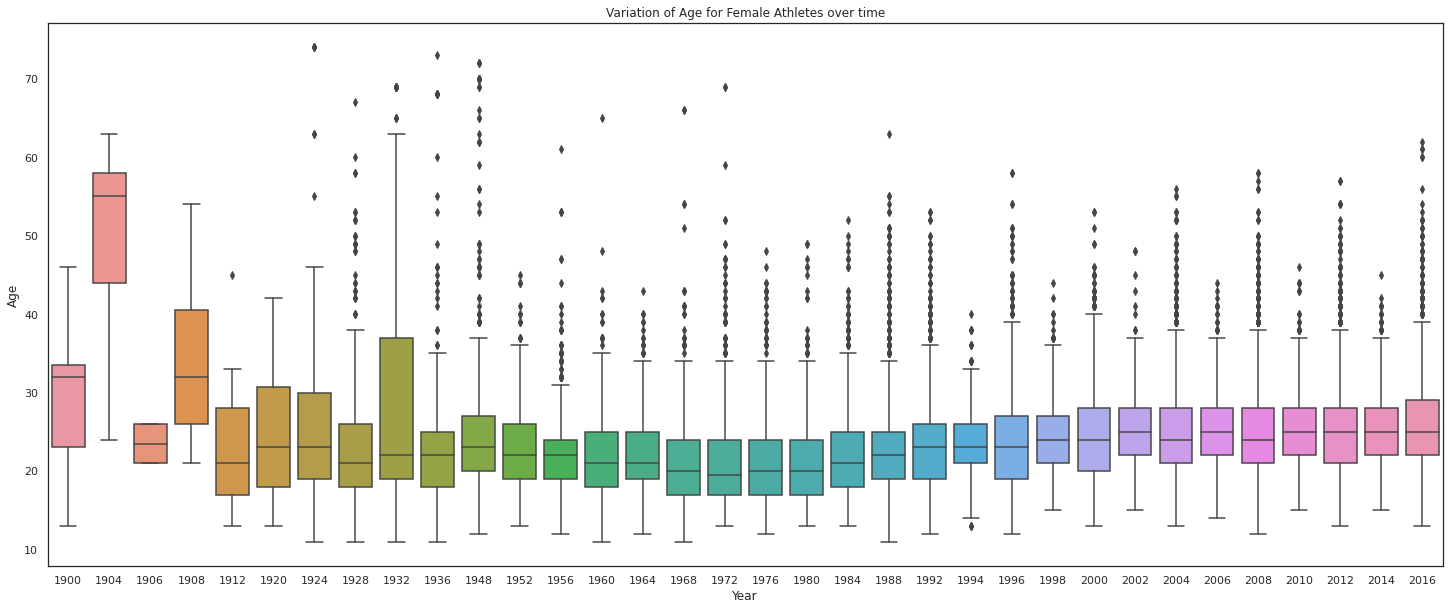

In [15]:
plt.figure(figsize=(25, 10))
sns.boxplot('Year', 'Age', data=women_ath)
plt.title('Variation of Age for Female Athletes over time')

Age distribution has a lower minimum and a lower minimum.

The variation is higher for the year 1904 when compared to others.

In [16]:
women_ath['ID'].loc[women_ath['Medal']=='Gold'].count()


3747

The total number of gold medals won by women over the years and across multiple events

In [17]:
#We are making a dataframe for the gold medals won by women athletes over the years
women_gold = women_ath[(women_ath.Medal=='Gold')]

women_gold.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN
283,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold,USA,NaN
1494,832,Nicola Virginia Adams,F,29.0,164.0,51.0,Great Britain,GBR,2012 Summer,2012,Summer,London,Boxing,Boxing Women's Flyweight,Gold,UK,NaN
1495,832,Nicola Virginia Adams,F,33.0,164.0,51.0,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Women's Flyweight,Gold,UK,NaN
1527,846,Valerie Kasanita Adams-Vili (-Price),F,23.0,193.0,120.0,New Zealand,NZL,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Shot Put,Gold,New Zealand,NaN


In [18]:
women_gold.isnull().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal     False
region    False
notes      True
dtype: bool

Text(0.5, 1.0, 'Gold Medals won by women over the years')

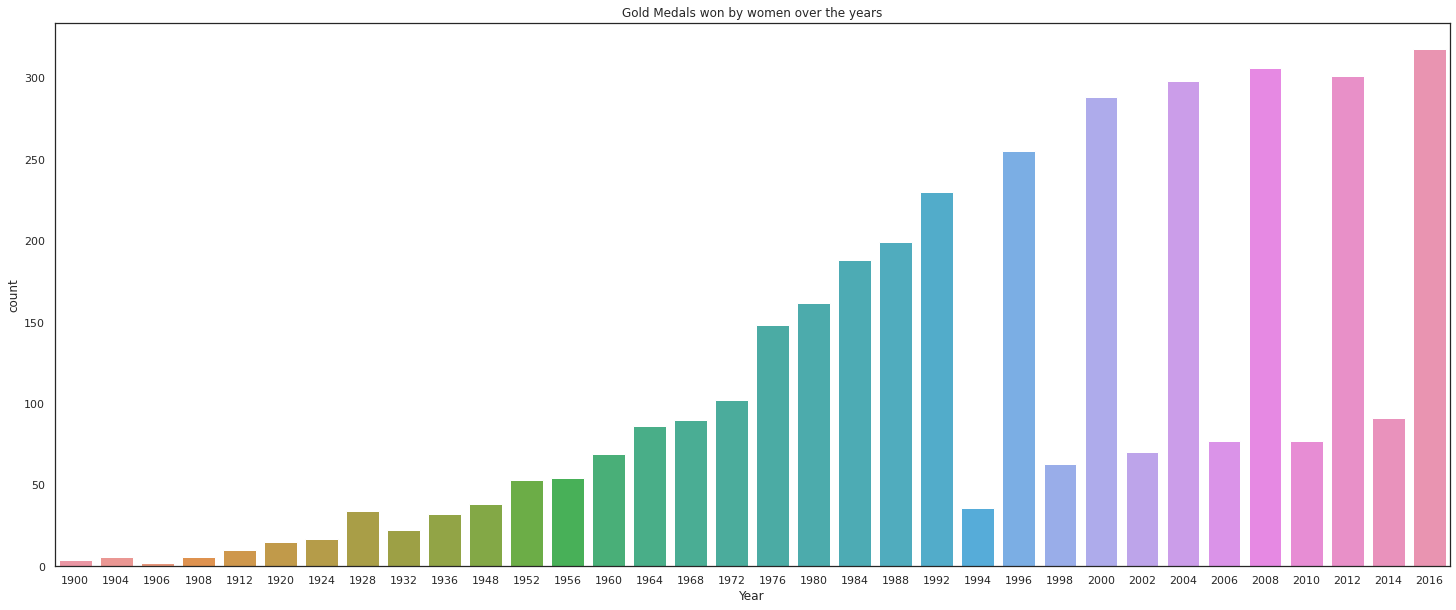

In [19]:
plt.figure(figsize=(25,10))
sns.countplot(women_gold['Year'])
plt.title('Gold Medals won by women over the years')

The above graph shows the total number of gold medals won by the women athleted over the years. From the rise in numbers we can infer that the number of woman participants along with the events being held by the women has increased.

Text(0.5, 1.0, 'Gold Medals won by women across different sports')

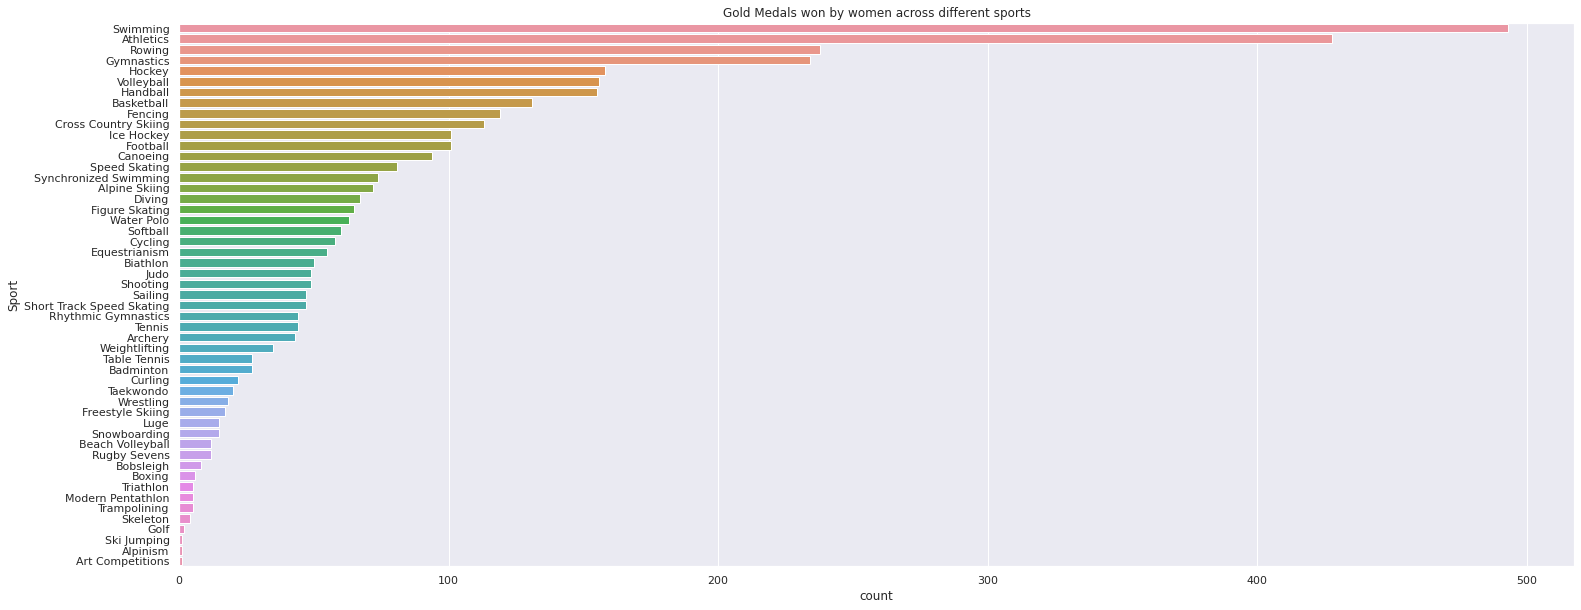

In [73]:
plt.figure(figsize=(25,10))
#plt.tight_layout()
sns.countplot(y='Sport', data=women_gold,order = women_gold['Sport'].value_counts().index)
plt.title('Gold Medals won by women across different sports')

From the above graph we can infer that the gold medals won by women in swimming is highest followed by athletics. Implying that there are more events conducted in the swimming for women.

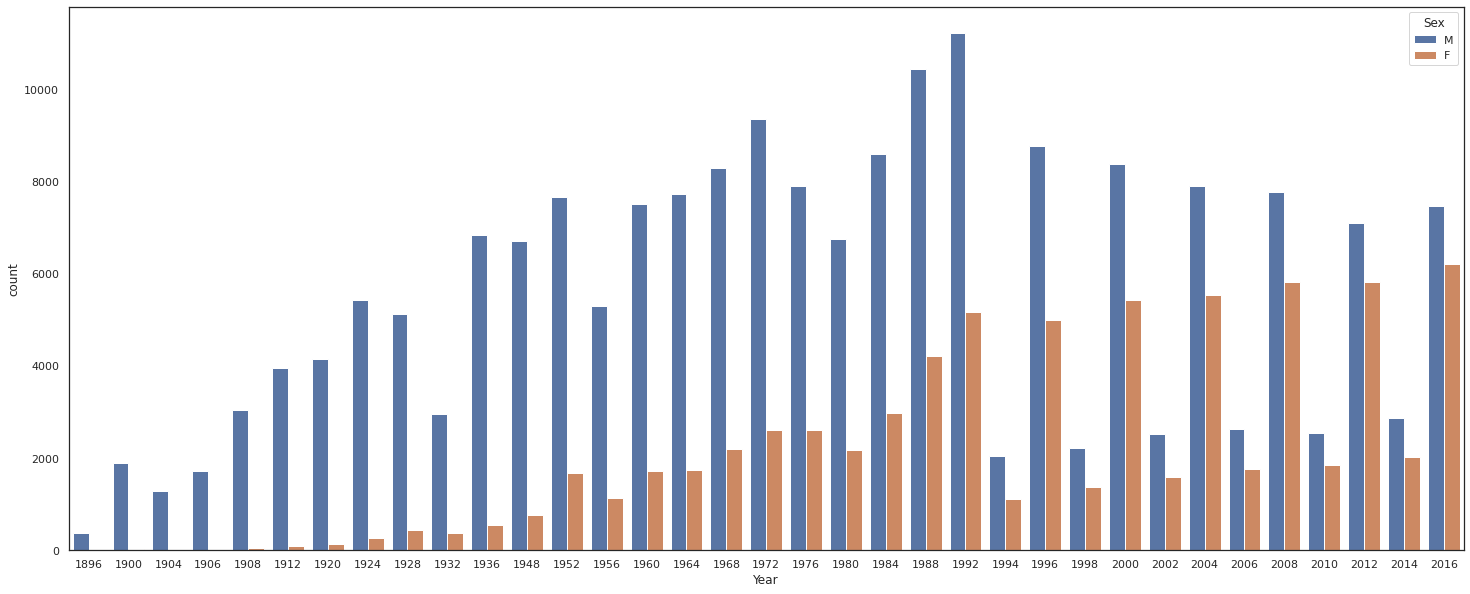

In [21]:
plt.figure(figsize=(25,10))

sns.countplot(x="Year",hue="Sex",data=complete_data)

- From the above plot we get to know about the number of women and men participants over the years. We can identify that the gap is being covered as the years go by, with there being no women participation in 1896 to having almost equal number of men and women athletes in 2016.

- Also, the number of male participants peaked in 1992 but it has been on the decline ever since


# Guiding Question-2:

How has the mean BMI varied for the gymnasts over the years?
      Competing in gymnastics has gotten difficult as the years passed by 
      with new records being set. This would have required a change to 
      the athlete’s health and other factors. We try to find out how the 
      BMI of the athletes has changed over the years to keep up with the 
      changing times.
    

Gymnastics in Olympics is categorised into three groups:
Artistic Gymnastics,
Rhythmic Gymnastics,
Trampoline.

Task-1 : To answer this question by comparing the BMI's of gymnasts in each of these categories from the inception of these disciplines in the Olympics.

Task-2 :
 To check whether there is any difference in the physique of gold medal winners in comparision to others.

In [23]:

Gymnasts_data=complete_data[complete_data["Sport"].isin(["Gymnastics","Rhythmic Gymnastics","Trampolining"])]
    

As each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events).We are trying to get  all the event data for all the Gymnastics in the first step from the sport column.

In [24]:
Gymnasts_data.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
43,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Floor Exercise,NaN,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
45,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Parallel Bars,NaN,Finland,NaN


## Data Cleaning and Wrangling

In [25]:
gyevents_tillnow=["Gymnastics Men's Individual All-Around","Gymnastics Men's Team All-Around","Gymnastics Men's Floor Exercise","Gymnastics Men's Horizontal Bar","Gymnastics Men's Parallel Bars","Gymnastics Men's Pommelled Horse","Gymnastics Men's Rings","Gymnastics Women's Team All-Around","Gymnastics Women's Individual All-Around","Gymnastics Women's Balance Beam","Gymnastics Women's Floor Exercise","Gymnastics Women's Uneven Bars","Gymnastics Men's Horse Vault","Gymnastics Women's Horse Vault"]
print(gyevents_tillnow)
Gymnasts_data=Gymnasts_data[Gymnasts_data["Sport"].isin(["Rhythmic Gymnastics","Trampolining"]) | Gymnasts_data["Event"].isin(gyevents_tillnow)]


["Gymnastics Men's Individual All-Around", "Gymnastics Men's Team All-Around", "Gymnastics Men's Floor Exercise", "Gymnastics Men's Horizontal Bar", "Gymnastics Men's Parallel Bars", "Gymnastics Men's Pommelled Horse", "Gymnastics Men's Rings", "Gymnastics Women's Team All-Around", "Gymnastics Women's Individual All-Around", "Gymnastics Women's Balance Beam", "Gymnastics Women's Floor Exercise", "Gymnastics Women's Uneven Bars", "Gymnastics Men's Horse Vault", "Gymnastics Women's Horse Vault"]


Gymnasts events have changed over the course of the time. As we are trying to compare the BMI's of the gymnasts from past to present. It is better to compare the BMI's of the athletes who have participated in the same events to get meaningul result as no current gymnast prepares himself to past events. 


The above printed events are all the gymnastics events which are there till present. So we are sorting our gymnasts dataframe to have only these results. As all the events in the Rhythmic Gymnastics and Trampoline are present till now we are using an 'or' to select the events for Artistic Gymnastics

In [26]:
Gymnasts_data.set_index("ID",inplace=True)

As each gymnast has an Id, I am setting that as an index for future reference.

In [27]:

Gymnasts_data["Sport"].replace("Gymnastics","Artistic Gymnastics",inplace=True)
Gymnasts_data["Sport"].replace("Trampolining","Trampoline",inplace=True)
Gymnasts_data.rename(columns={"Sport":"Type of Gymnastics"},inplace=True)

As I want to do separate analysis for each gymnastics type and our data doesn't have any other sport. I am renaming the sport column into Type of Gymnastics and I am renaming the names appropriately.

In [28]:
Gymnasts_data=Gymnasts_data[Gymnasts_data["Weight"].isna()==False]
Gymnasts_data=Gymnasts_data[Gymnasts_data["Height"].isna()==False]

As our motive is to find the BMI of each gymnast, as height and weight are required for it inorder to determine how it varies over the years. I am removing the null values of it as replacing these null values with any other value might lead to improper analysis.

In [29]:
Gymnasts_data=Gymnasts_data[Gymnasts_data["Age"].isna()==False]
Gymnasts_data=Gymnasts_data[Gymnasts_data["Age"] > 19]

For ages 20 and above, the scale on which we measure the BMI for everyone's the same irrespective of gender. For ages below 20, the amount of body fat varies based on their age and gender. So, the scale on which we measure the BMI for what is considered to be healthy is specific to every individual's age based on their gender. So we can only compare BMI's of two individuals only if they are of same age and gender. 



So, eventhough we are just using BMI's to find out how the physique changed over the years and not using the scale to say whether a gymnast is healthy or not. We cannot do this with ages below 20 as a decrease in BMI effects an increase or decrease  in weight based on that particular athlete's age and gender. As we are not trying to find how a particular age and gender's BMI varies with years for every age below 20. This condition also requires for a particular age person specific to be present in every olympic year. So,We are excluding the gymnasts with ages below 20 and we are also removing the gymnasts whose age is null, as we dont know which category they fall under whether above 19 or not.

In [30]:
Gymnasts_data["BMI"]=Gymnasts_data["Weight"]/((Gymnasts_data["Height"]/100)**2)

We are calculating the BMI based on the formula of weight in kg over height in metre square (as height is given in cm we are converting that into metres).


In [31]:
Gymnasts_data.head(5)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Type of Gymnastics,Event,Medal,region,notes,BMI
ID,,,,,,,,,,,,,,,,,
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Artistic Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN,20.897959
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Artistic Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN,20.897959
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Artistic Gymnastics,Gymnastics Men's Floor Exercise,NaN,Finland,NaN,20.897959
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Artistic Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN,20.897959
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Artistic Gymnastics,Gymnastics Men's Parallel Bars,NaN,Finland,NaN,20.897959


This is our result main dataframe after going through those steps.



For the first visualization task I want to plot the variation of BMI's for each Type of Gymnasts for every year from thier introduction to Olympics. I want to use either a box plot or violin plots for these.

For the second I want to plot the mean BMI of Gold medal winners in comparision to others for every year. 

For both of these tasks I need a single dataframe which has all the participants for a particular year based on the type of gymnastics he participated in it. A column to indicate wether that participant has won a gold or not.(This part we already did above)

The current dataframe has a row for every event a gymnast has participated in under a paricualar Type of Gymnastics. So This makes him appear multiple times in the data frame for event he is participating in. So, we need ro remove these duplicates.

In [32]:
graphing_df=Gymnasts_data


I am making a copy of it inorder to do data filtering particular to the visualization tasks

In [33]:
graphing_df["Gold"]= graphing_df["Medal"]=="Gold"
graphing_df=graphing_df.drop(["Event","Season","City","Medal","notes","Team"],axis=1)

For our second test as we are trying to compare the BMI's of Gold medal winners to others, I am making a column to store whether an athlete has won a gold medal for that particular competetion or not.
Second step involves removing the columns which are not necessary for further analysis.

In [34]:
graphing_df=graphing_df.drop_duplicates()

This line removes the duplicates based on when an entire row matches with other. That means if a gymnast has participated in multiple events under a particular type of gymnastics in a year then this statement will remove the rows when the gymnast has won gold multiple times in a single year or when a gymnast has not won any medal multiple times in a single year. This will still leave us with 2 rows of a  gymnast when he has participated in multiple events with winning a gold medal atleast once and not winning atleast once for any events for a particular year under a particular type of Gymnastic.

In [35]:
graphing_df.head(5)

,Name,Sex,Age,Height,Weight,NOC,Games,Year,Type of Gymnastics,region,BMI,Gold
ID,,,,,,,,,,,,
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,FIN,1948 Summer,1948,Artistic Gymnastics,Finland,20.897959,False
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,FIN,1948 Summer,1948,Artistic Gymnastics,Finland,20.897959,True
17,Paavo Johannes Aaltonen,M,32.0,175.0,64.0,FIN,1952 Summer,1952,Artistic Gymnastics,Finland,20.897959,False
51,Nstor Abad Sanjun,M,23.0,167.0,64.0,ESP,2016 Summer,2016,Artistic Gymnastics,Spain,22.948116,False
244,Raouf Abdelraouf,M,22.0,167.0,63.0,EGY,2000 Summer,2000,Artistic Gymnastics,Egypt,22.589551,False


Now from looking at our new data frame in comparision to older we can see that it doesn't have as many duplicates as before. 

In [36]:
graphing_df=graphing_df.sort_values(by=["Year","Name","Type of Gymnastics","Gold"])
unique_participants=graphing_df.drop_duplicates(subset=['Name', 'Year',"Type of Gymnastics"], keep="last") 

So inorder to further remove the entry of a gymnast which appears twice when he has won a gold atleast once and when he has not won a gold atleast once in that year. In these two entries we want to remove the event for which gold is not won and keep the one with gold, as it is required for second visualization.
So, inorder to remove it we will first sort the dataframe, which sorts all the values in order mentioned above and keeps the row with when gold is won in the last.
So now when we apply the drop_duplicates function it removes the rows where the "Name", "Year","Type of Gymnastics" columns are matched expect for the last one which is the row with gold won.
After this, we have a data frame with only one row for every participant for each type of Gymnastics, for that particular year and whether that person has won a gold or not. Thus reaching our goal of having all the participants for a particular year under a particular type of gymnastics.

In [37]:
unique_participants.head(5)

,Name,Sex,Age,Height,Weight,NOC,Games,Year,Type of Gymnastics,region,BMI,Gold
ID,,,,,,,,,,,,
107613,Carl Schuhmann,M,26.0,159.0,70.0,GER,1896 Summer,1896,Artistic Gymnastics,Germany,27.688778,True
37689,Eugen W. (-Eugene) Frstenberger,M,20.0,153.0,61.0,GER,1900 Summer,1900,Artistic Gymnastics,Germany,26.058354,False
92778,Georg Hugo Richard (-Hugo George) Peitsch,M,21.0,175.0,71.0,GER,1900 Summer,1900,Artistic Gymnastics,Germany,23.183673,False
92778,Georg Hugo Richard (-Hugo George) Peitsch,M,25.0,175.0,71.0,GER,1904 Summer,1904,Artistic Gymnastics,Germany,23.183673,False
45339,Gustav Hmmerlin,M,23.0,160.0,59.0,USA,1904 Summer,1904,Artistic Gymnastics,USA,23.046875,False


## Visualizations- Task 1

### Artistic Gymnastics

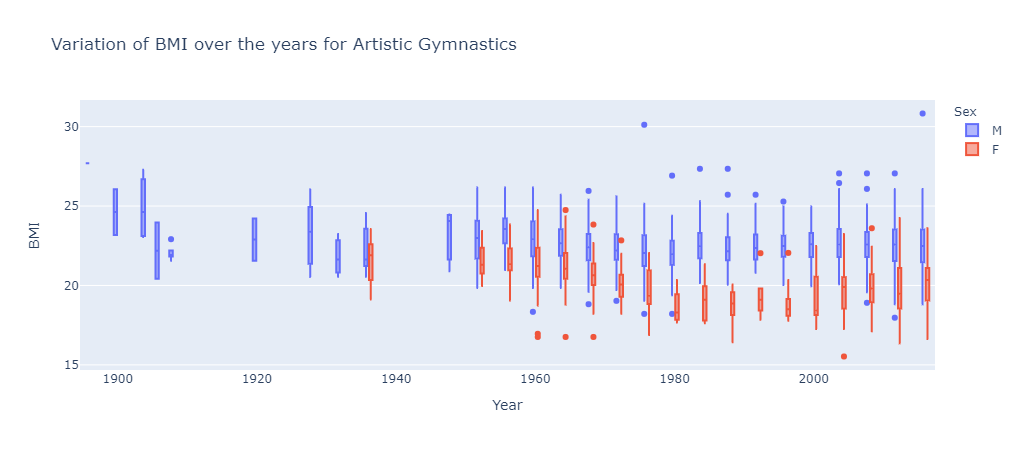

In [38]:
fig=px.box(unique_participants[unique_participants["Type of Gymnastics"]=="Artistic Gymnastics"], x="Year", y="BMI", color="Sex",title="Variation of BMI over the years for Artistic Gymnastics")
fig.show()

Overall,we can see that there is a slight decrease in the BMI's of Artistic Gymnastics over the years for the Male.  We can see also see that the Inter quartile range has decreased over the years and majority of athletes have BMI around 22 as opposed to 23 or 24.

Whereas for the female athletes we can see that there is more of a visible difference that it decreased over the years. Majority of the athletes had BMI around 21 in the starting years, now it has come to 19. We can also see that BMI of males is slighltly higher than females in the starting years, whereas this difference is considerably large in the recent years. This difference  can be linked to the requirement difference of events between Men and Women. Where Men are required to give equal importance to Upper body strength and tumbling and women are required to highlight tumbling skills over displays of pure strength.

We can also conclude from the graph that decrease in BMI of athletes over the years shows that artistic gymnasts are becoming leaner 
over the years.

### Rhythmic Gymnastics

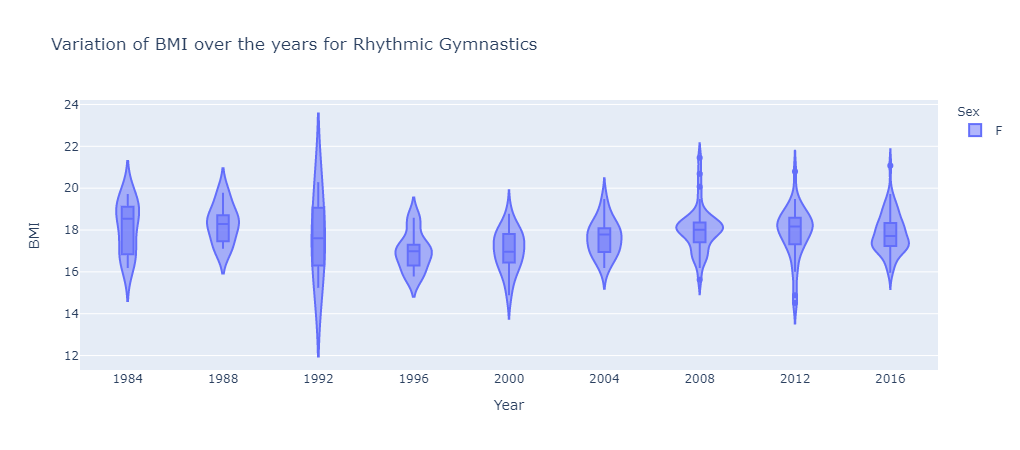

In [39]:
fig=px.violin(unique_participants[unique_participants["Type of Gymnastics"]=="Rhythmic Gymnastics"], x="Year", y="BMI", color="Sex",box=True,title="Variation of BMI over the years for Rhythmic Gymnastics")
fig.show()

From the first glance of violinplots over the Olympic years from 1984 to 2016. We can see that there hasn't been a significant increase or decrease of the athlethes BMI's over the years. By taking a closer look we can find that the violin plots are becoming wider with each passing olympic year. This tells us that the variation in BMI's of the athletes has decreased over the years with increased frequency of athletes between 17 and 18. This can be due to increased awareness for reaching into a particular shape for the Rhythmic Gymnastics over the years.

### Trampoline

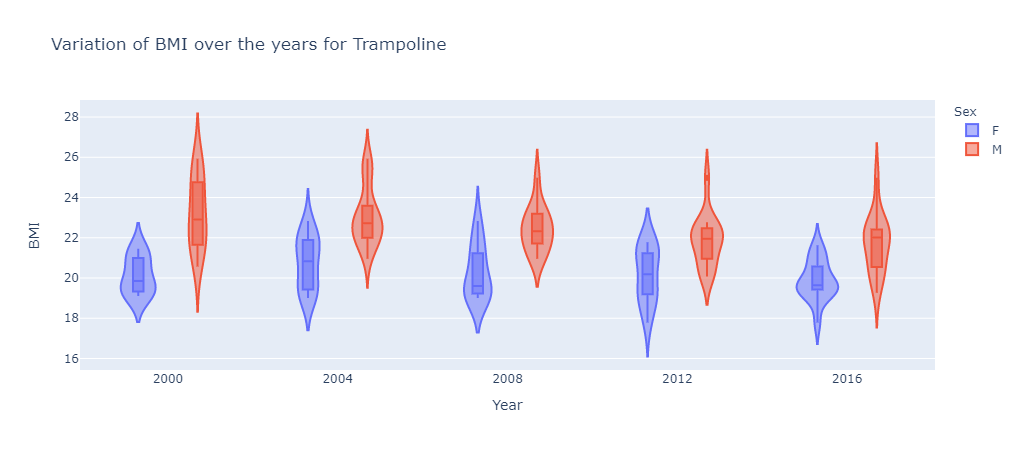

In [40]:
fig=px.violin(unique_participants[unique_participants["Type of Gymnastics"]=="Trampoline"], x="Year", y="BMI", color="Sex",box=True,title="Variation of BMI over the years for Trampoline")
fig.show()

For the Trampoline Male gymnasts, we can see that there has been slight decrease in the BMI's over the years which can be witnessed by the shift of the density from around 23 in the year 2000 to 22 in the year 2016. Whereas, the BMI's for female athletes has remained constant but there is slight decrease in the shift of density from 20 in 2000 to 19 in 2006. We can see that there is a noticeable difference between the BMI's of male and female trampoline gymnasts for every olympic year.

## Insights for Task-1

We can say that there has been a decrease in the BMI of gymnasts over the course of the years indicating that the gymnasts have become leaner and agile. This would also suggest that there is a decrease in the body fat composition of the body as the requirement for strength in gymnastics has not decreased over the time and so a vast majority of their weight must be muscle mass, which is fundamental to power production. This change in the body of the gymnast can be attributed to the increased awareness of the sport over the years to reach an elite physique catered for that particular gymnastic event. We have also observed that the difference in BMI's of male and female can be attributed to their events where men are required to give more preference to upper-body strength in comparision to females.

## Visualizations Task-2

Now we want to compare how the Mean BMI a of gold medal winners varies with others in each category of gymnasts for every year over the course of Olympic history.

In [41]:
mean_segregation=unique_participants.groupby(["Year","Type of Gymnastics","Gold"]).mean().reset_index()

This essentially groups unique participant dataframe into gold and other for every year and type of gymnastics. I find the mean of it to get the mean BMI for gold medal winners and others. This dataframe can now be used to plot gold medal winners in comparision to others for a particular type of gymnasts over the years.

In [42]:
mean_segregation.head()

,Year,Type of Gymnastics,Gold,Age,Height,Weight,BMI
0,1896,Artistic Gymnastics,True,26.000000,159.000000,70.0,27.688778
1,1900,Artistic Gymnastics,False,20.500000,164.000000,66.0,24.621014
2,1904,Artistic Gymnastics,False,24.333333,167.666667,69.0,24.504098
3,1904,Artistic Gymnastics,True,26.000000,165.000000,71.0,26.078972
4,1906,Artistic Gymnastics,False,25.500000,177.500000,70.5,22.187160


### Artistic Gymnastics

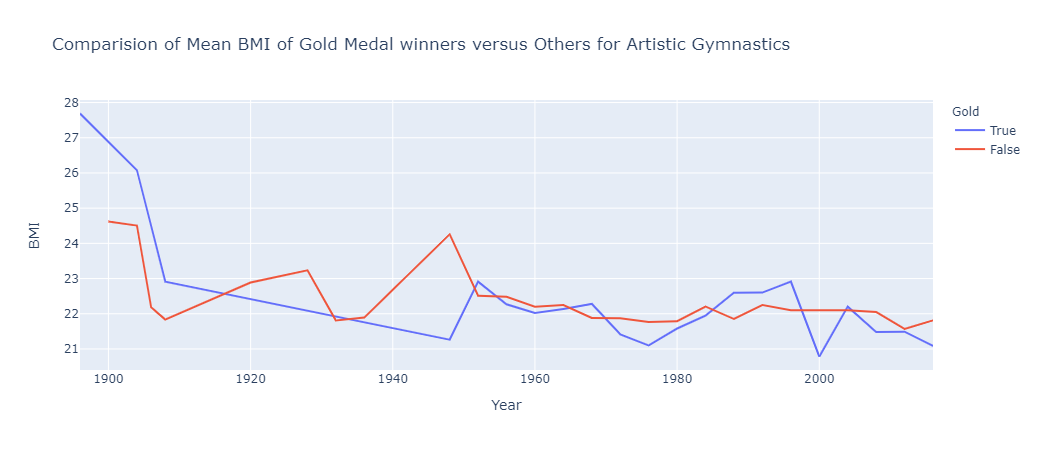

In [43]:
fig=px.line(mean_segregation[mean_segregation["Type of Gymnastics"]=="Artistic Gymnastics"],x="Year",y="BMI",color= "Gold",title="Comparision of Mean BMI of Gold Medal winners versus Others for Artistic Gymnastics")
fig.show()

From the line graph we can notice that there isn't much difference between the mean BMI's of gold medal winners to others expect for the olympic year 1948. Other than that we can visualize that the BmI's of Gold medal winners is slightly lower in comparision to others. As this is a minute difference we can say that there is no difference in BMi's of gold medal winner and non-gold medal winners for majority of Olympic years

### Rhythmic Gymnasts

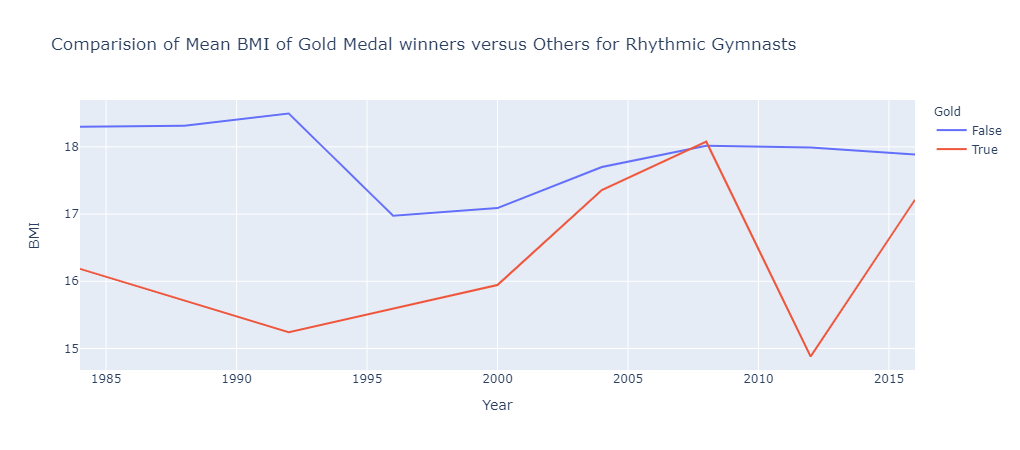

In [44]:
fig=px.line(mean_segregation[mean_segregation["Type of Gymnastics"]=="Rhythmic Gymnastics"],x="Year",y="BMI",color= "Gold",title="Comparision of Mean BMI of Gold Medal winners versus Others for Rhythmic Gymnasts")
fig.show()

This is an interesting result which depicts that the average BMI of gold medal winners for Rhythmic Gymnasts has been less than than others for majority of the years expect for the year 2008. This indicates there might be a relation between the Rhythmic gymnasts BMI and winning a gold.


### Trampoline 

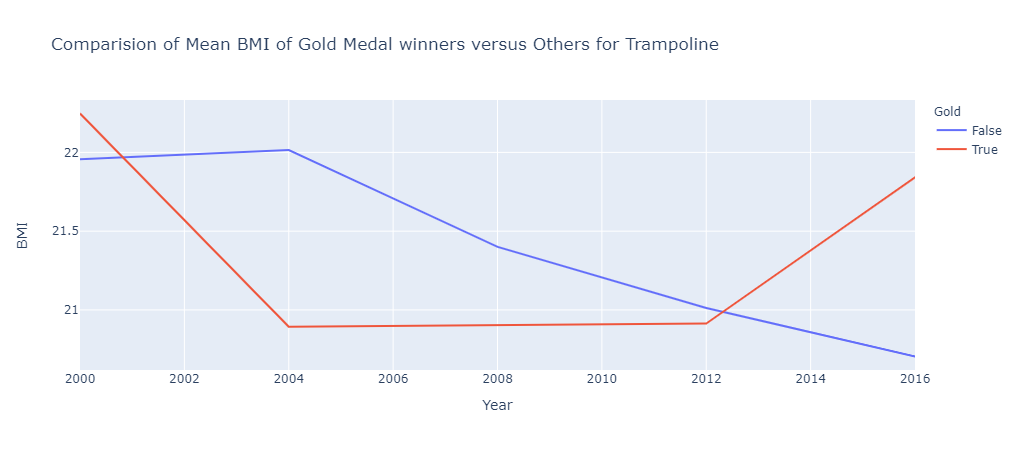

In [45]:
fig=px.line(mean_segregation[mean_segregation["Type of Gymnastics"]=="Trampoline"],x="Year",y="BMI",color= "Gold",title="Comparision of Mean BMI of Gold Medal winners versus Others for Trampoline")
fig.show()

From this graph, we can identify Trampoline gymnasts who won gold medals tend to have lower BMI than others during the intial years of the Olymics. But, More data is required to derive whether there is any meaningful relation between low bmi and winning a gold medal.

## Insights for Task-2

For artistic gymnasts there is no difference in pyhsique between gold and the rest. Inorder to find out whether there is any significance in the result that having lower BMI resulted in a Rhythmic Gymnast win gold in the olympic history and to what extent it is true. In order to answer this we need to take all the gymnasts physical attributes like balance, agility, speed,flexible and other factors like the coaching taken, experience should all be considered for these gymnasts by doing a statistical modelling tests geared for this by meeting all its appropriate conditions.



## Guiding Question 3:

How was the performance of various countries impacted due to the separation
of winter and summer sessions?

    o Due to changes where the winter and summer session were getting
    held at different times after 1992. The countries had a far lesser
    time preparing for it and our aim is to uncover how it has impacted
    their performance over the years

In [46]:
summer_session = complete_data[(complete_data.Season=='Summer') & (complete_data.Year>1992)]

winter_session = complete_data[(complete_data.Season=='Winter') & (complete_data.Year>1992)]



Creating new dataframes containing data for the winter and summer session after 1992 when they were being conducted separately.

In [47]:
summer_session.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NaN,Finland,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
57,18,Timo Antero Aaltonen,M,31.0,189.0,130.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Shot Put,NaN,Finland,NaN


In [48]:
summer_session.describe()

,ID,Age,Height,Weight,Year
count,81254.000000,81243.000000,78729.000000,78528.000000,81254.000000
mean,68641.319640,25.642578,176.079577,71.171196,2005.926059
std,39342.053834,5.589349,11.481387,15.846335,6.854147
min,2.000000,12.000000,133.000000,28.000000,1996.000000
25%,34612.500000,22.000000,168.000000,60.000000,2000.000000
50%,69259.000000,25.000000,176.000000,70.000000,2004.000000
75%,102337.000000,29.000000,184.000000,80.000000,2012.000000
max,135568.000000,71.000000,226.000000,214.000000,2016.000000


In [49]:
winter_session.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN
15,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN,USA,NaN
16,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN,USA,NaN


In [50]:
winter_session.describe()

,ID,Age,Height,Weight,Year
count,24549.000000,24545.000000,24221.000000,23969.000000,24549.000000
mean,70248.319565,25.672601,174.790058,70.851183,2004.922156
std,38490.704385,4.759148,8.837844,12.998650,6.713607
min,5.000000,13.000000,142.000000,32.000000,1994.000000
25%,38449.000000,22.000000,168.000000,60.000000,1998.000000
50%,68845.000000,25.000000,175.000000,70.000000,2006.000000
75%,103757.000000,29.000000,181.000000,80.000000,2010.000000
max,135571.000000,55.000000,206.000000,127.000000,2014.000000


Text(0.5, 1.0, 'Ratio of Men and Women in Summer Session')

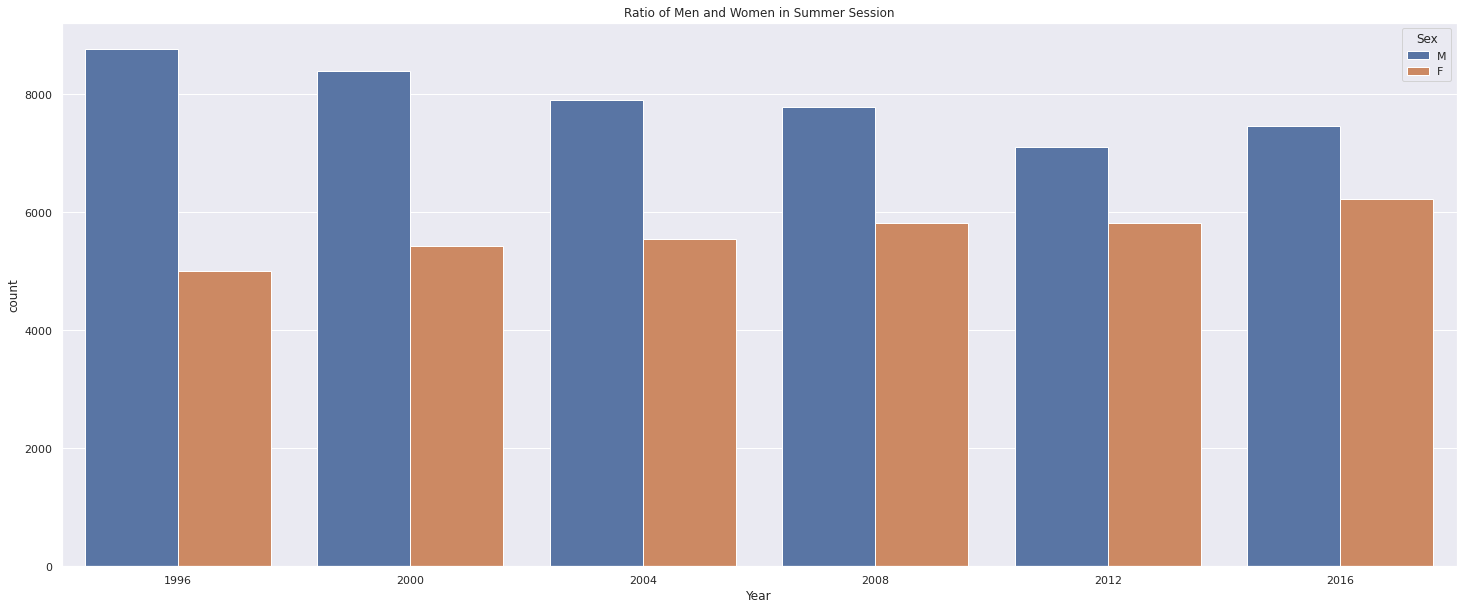

In [51]:
plt.figure(figsize=(25,10))

sns.set(style='darkgrid')
sns.countplot(x="Year",hue="Sex",data=summer_session)

plt.title('Ratio of Men and Women in Summer Session')

The number of women participants has increased over the years when compared to the male participants, which has been decreasing.

Text(0.5, 1.0, 'Ratio of Men and Women during Winter Sessions')

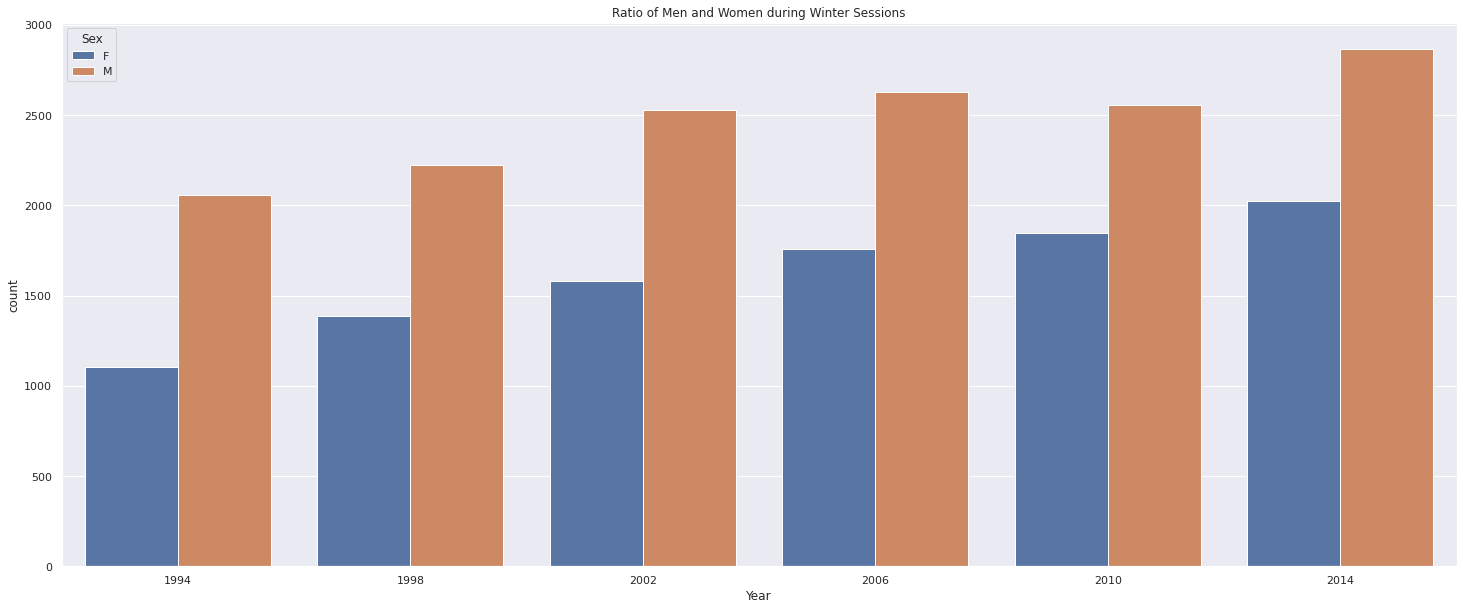

In [52]:
sns.set(style="darkgrid")
plt.figure(figsize=(25,10))

sns.countplot(x="Year",hue="Sex",data=winter_session)

plt.title("Ratio of Men and Women during Winter Sessions")

The number of male and female participants has been increasing over the years for the winter session. This could be attributed to adding the number of events being conducted during the winter session and the ability of the countries to specifically nurture athletes attenuated for the winter events.

In [53]:
winter_session['ID'].loc[winter_session['Medal']=='Gold'].count()

969

In [54]:
summer_session['ID'].loc[summer_session['Medal']=='Gold'].count()

3903

The number of Gold Medals acquired in Summer Session is more than the number of gold medals during the winter session. This could be because there are less events included in the winter session, which further implies why there are lesser participants in them when compared to the summer session

### Further dividing the dataset to only include the information for the athletes that have won a gold medal during the winter and summer session.

In [55]:
winter_session_gold = winter_session[(winter_session.Medal=='Gold')]

summer_session_gold = summer_session[(summer_session.Medal=='Gold')]


Text(0.5, 1.0, 'Gold medals won across the years in winter session')

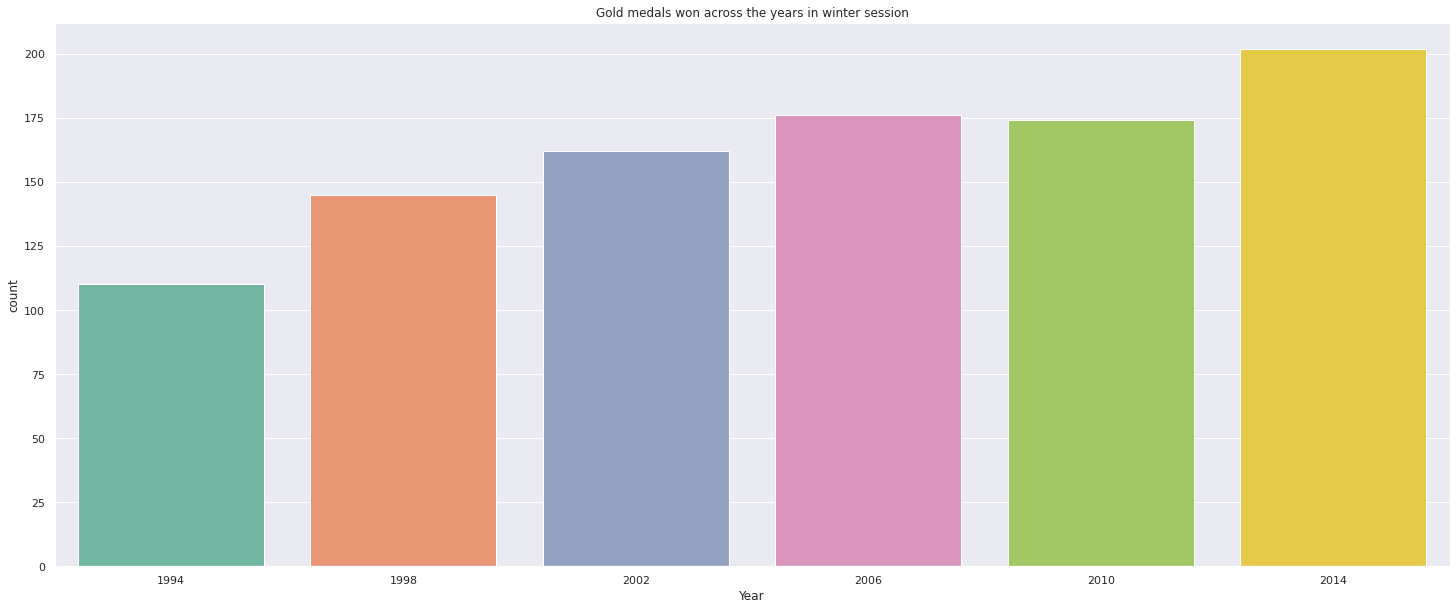

In [56]:
plt.figure(figsize=(25,10))

sns.countplot(x='Year',data=winter_session_gold,palette='Set2')

plt.title('Gold medals won across the years in winter session')

The number of gold medals being given out in the winter session has been increasing over the years. This could be because of the increase in population for team sports as well as the inclusion of other individual winter events.

Text(0.5, 1.0, 'Gold medals won across the events in winter session')

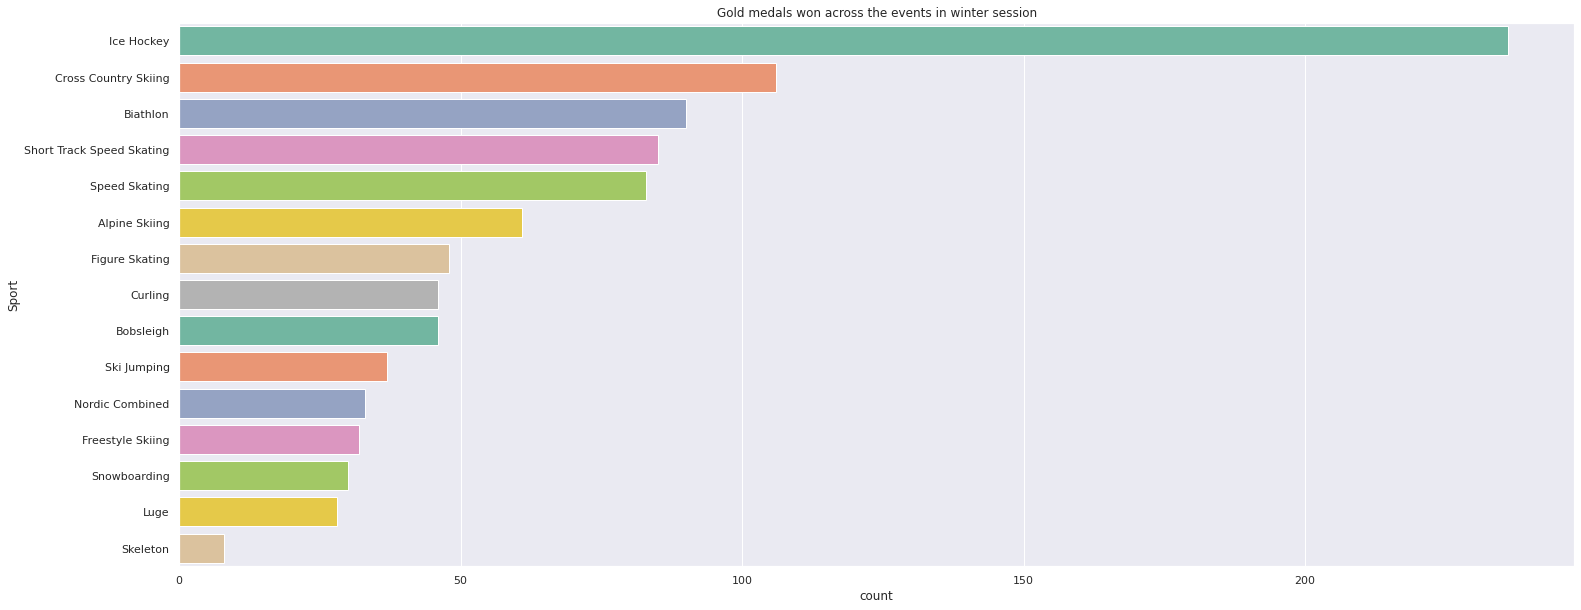

In [72]:
plt.figure(figsize=(25,10))

#sns.countplot(x='Sport',data=winter_session_gold,palette='Set2')
sns.countplot(y=winter_session_gold['Sport'],order = winter_session_gold['Sport'].value_counts().index,palette='Set2')

#plt.xticks(rotation=90)
plt.title('Gold medals won across the events in winter session')

From the above graph we can infer that the most number of gold medals has been giving out for 'Ice Hockey', this is because it is a team sport. It is followed by 'Cross Country Skiing', which might have the most number of individual events for the athletes to compete in.

Text(0.5, 1.0, 'Gold medals won across the years in summer session')

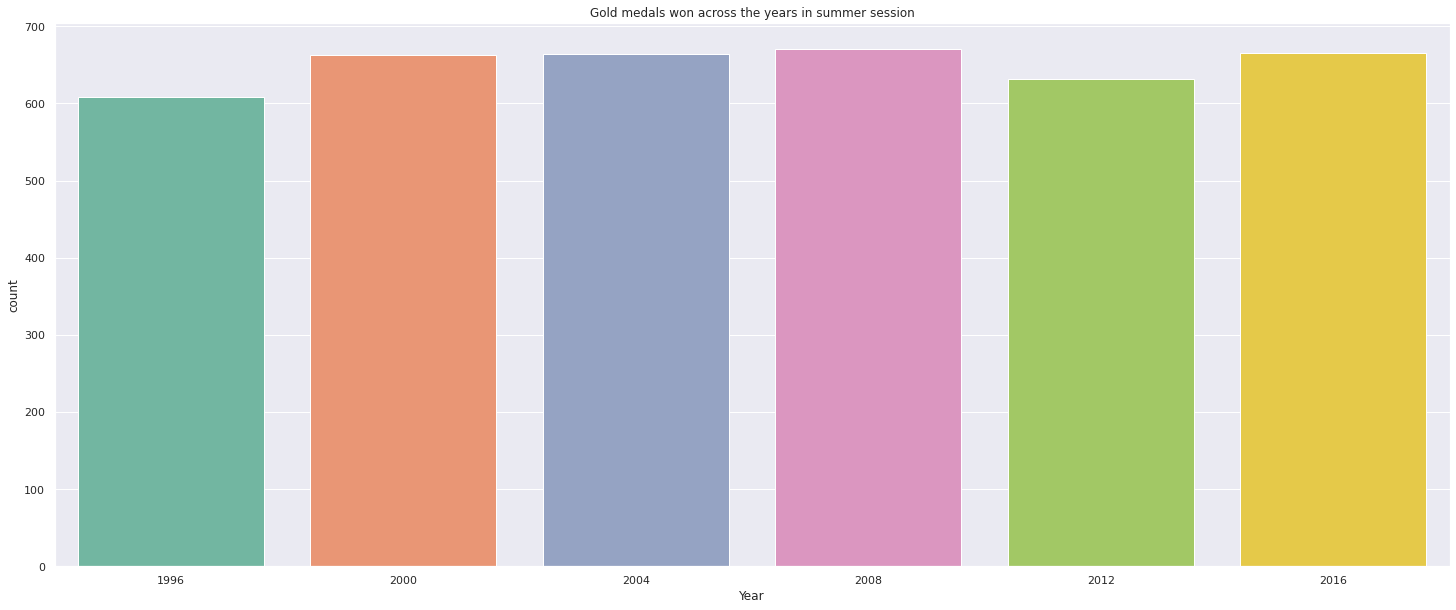

In [58]:
plt.figure(figsize=(25,10))

sns.countplot(x='Year',data=summer_session_gold,palette='Set2')

plt.title('Gold medals won across the years in summer session')

The number of gold medals that has been given out is almost the same over the years, signifying that the number of events has remained constant even though there were some changes in the number of participants over the years.

Text(0.5, 1.0, 'Gold medals won across the events in summer session')

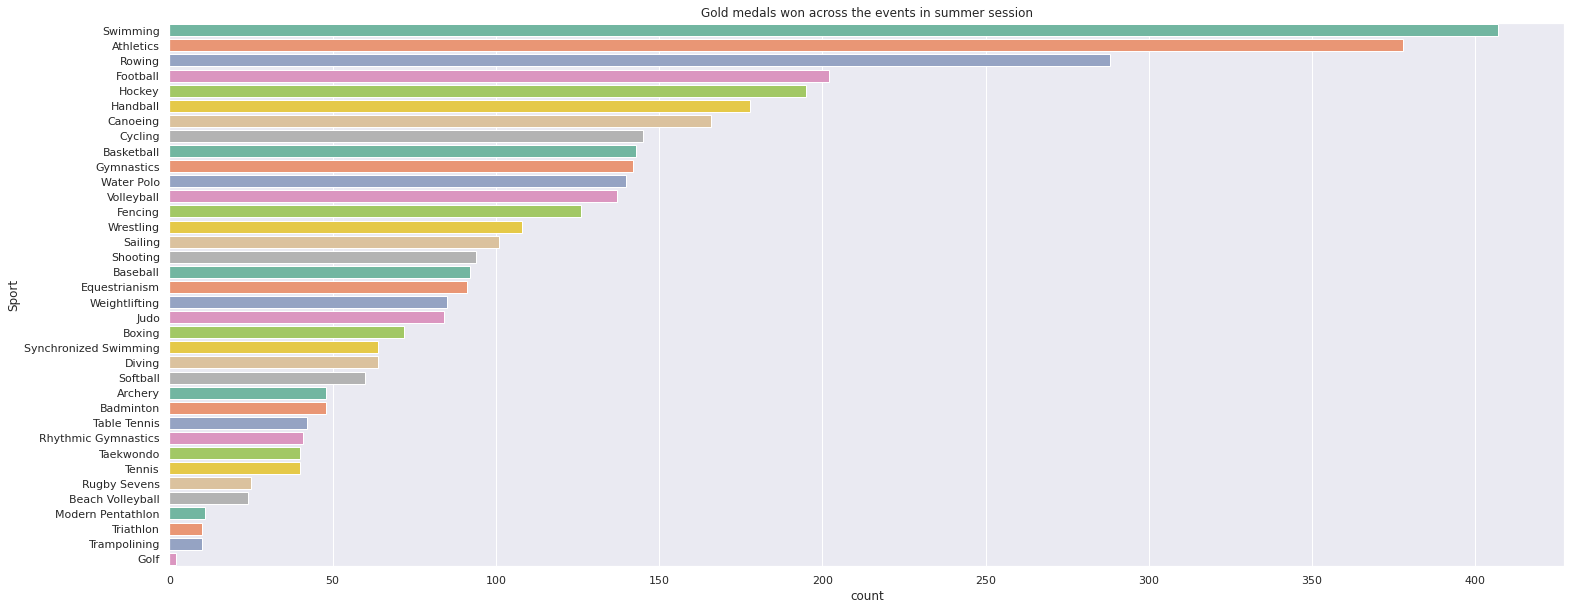

In [59]:
plt.figure(figsize=(25,10))

sns.countplot(y='Sport',data=summer_session_gold,palette='Set2',order = summer_session_gold['Sport'].value_counts().index)

#plt.xticks(rotation=90)

plt.title('Gold medals won across the events in summer session')

In [60]:
winter_session['Sport'].unique()

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Bobsleigh', 'Figure Skating', 'Nordic Combined',
       'Luge', 'Freestyle Skiing', 'Curling', 'Snowboarding',
       'Ski Jumping', 'Short Track Speed Skating', 'Skeleton'],
      dtype=object)

The above events are being conducted during the winter session

In [61]:
summer_session['Sport'].unique()

array(['Judo', 'Badminton', 'Sailing', 'Athletics', 'Handball',
       'Weightlifting', 'Wrestling', 'Rowing', 'Swimming', 'Football',
       'Boxing', 'Gymnastics', 'Taekwondo', 'Fencing', 'Basketball',
       'Diving', 'Canoeing', 'Water Polo', 'Tennis', 'Cycling', 'Hockey',
       'Equestrianism', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Shooting', 'Modern Pentathlon',
       'Table Tennis', 'Baseball', 'Rhythmic Gymnastics', 'Rugby Sevens',
       'Trampolining', 'Beach Volleyball', 'Triathlon', 'Golf'],
      dtype=object)

The above events are being conducted during the summer session.

Therefore, we can say that the number of events in summer session is more than the number of events in winter session, hence the cause of more number of participants and gold medals.

In [62]:
#Merged data for winter and summer session after 1992

merged_data = complete_data[complete_data.Year>1992]

In [63]:
merged_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN
15,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN,USA,NaN


### Now we want to check whether the separation of Olympics had any effect on the winning percentages of a winter sport athlete. 

In [90]:
total_winter_games=complete_data[complete_data["Sport"].isin(winter_session['Sport'].unique())].sort_values(by="Year")
Winter_game_before1992=total_winter_games[total_winter_games["Year"] <= 1992]
Winter_game_after1992=total_winter_games[total_winter_games["Year"] > 1992]


In [91]:
Winter_game_before1992=Winter_game_before1992[Winter_game_before1992["Sport"] != "Curling"]

Removing Curling as Curling has incorrect data as it doesn't have participants with no medals, which is impossible in olympics so removing it.

In [47]:
Winter_game_after1992=Winter_game_after1992[~Winter_game_after1992["Sport"].isin(["Snowboarding","Curling"])]

Removing SnowBoarding since it is not present before 1992 and removing curlin as we are removing in winter games before 1992.

In [48]:
Winter_game_before1992=Winter_game_before1992.drop(["Team","NOC","Games","Season","City","notes"],axis=1)
Winter_game_before1992=Winter_game_before1992.drop_duplicates()
Winter_game_before1992["Medal"]=Winter_game_before1992["Medal"].fillna("No Medal")
medals_non_before1992=Winter_game_before1992.groupby("Medal").count()
Number_medalwonbefore1992=medals_non_before1992["ID"]["Bronze"]+medals_non_before1992["ID"]["Gold"]+medals_non_before1992["ID"]["Silver"]

In [83]:
medals_non_before1992

,ID,Name,Sex,Age,Height,Weight,Year,Sport,Event,region
Medal,,,,,,,,,,
Bronze,930,930,930,928,657,631,930,930,930,930
Gold,932,932,932,932,724,692,932,932,932,932
No Medal,21260,21260,21260,20982,13938,13565,21260,21260,21260,21260
Silver,946,946,946,945,730,706,946,946,946,946


In [84]:
percenatge_winningbefore1992=   (Number_medalwonbefore1992*100)/medals_non_before1992["ID"].sum()

In [51]:
Winter_game_after1992=Winter_game_after1992.drop(["Team","NOC","Games","Season","City","notes"],axis=1)
Winter_game_after1992=Winter_game_after1992.drop_duplicates()
Winter_game_after1992["Medal"]=Winter_game_after1992["Medal"].fillna("No Medal")

medals_non_after1992=Winter_game_after1992.groupby("Medal").count()

Number_medalwonafter1992=medals_non_after1992["ID"]["Bronze"]+medals_non_after1992["ID"]["Gold"]+medals_non_after1992["ID"]["Silver"]

In [85]:
medals_non_after1992

,ID,Name,Sex,Age,Height,Weight,Year,Sport,Event,region
Medal,,,,,,,,,,
Bronze,890,890,890,890,888,879,890,890,890,890
Gold,893,893,893,893,887,873,893,893,893,893
No Medal,20500,20500,20500,20496,20184,20005,20500,20500,20500,20500
Silver,883,883,883,883,881,877,883,883,883,883


In [87]:
percenatge_winningafter1992=  (Number_medalwonafter1992*100)/medals_non_after1992["ID"].sum()


In [88]:
Seriespercentage=pd.Series({"WinningPercentageafter1992":percenatge_winningafter1992,"WinningPercentagebefore1992":percenatge_winningbefore1992})

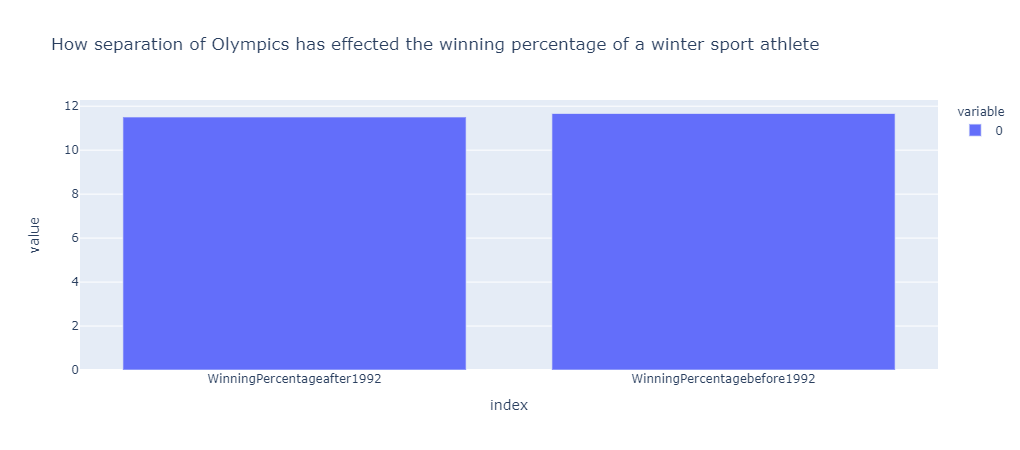

In [89]:
fig=px.bar(Seriespercentage,title='How separation of Olympics has effected the winning percentage of a winter sport athlete')
fig.show()

When the winning percentage is calculated across all winter games, we see that the difference is very minute.So, we can say that winning a medal in winter games by an athlete isn't affected by the separation of Olympics.

To check whether this result holds true for each winter game. We will check how winning percentage is effected for each olympic winter sport before separation and after separation of Winter Olympics.

In [60]:
total_participants_before1992=Winter_game_before1992.groupby(["Sport"]).count()["ID"]
total_participants_after1992=Winter_game_after1992.groupby(["Sport"]).count()["ID"]
Medalwinner_before1992=Winter_game_before1992[Winter_game_before1992["Medal"]!="No Medal"]
Medalwinner_after1992=Winter_game_after1992[Winter_game_after1992["Medal"]!="No Medal"]
percantage_winning_before1992=(Medalwinner_before1992.groupby("Sport").count()["ID"]*100)/total_participants_before1992
percantage_winning_after1992=(Medalwinner_after1992.groupby("Sport").count()["ID"]*100)/total_participants_after1992

In [66]:
percantage_winning_before1992

Sport
Alpine Skiing                 4.697604
Biathlon                      9.630147
Bobsleigh                    14.604236
Cross Country Skiing          9.690502
Figure Skating               18.374817
Freestyle Skiing              8.450704
Ice Hockey                   27.090849
Luge                         12.060302
Nordic Combined              10.296412
Short Track Speed Skating    25.000000
Skeleton                     24.000000
Ski Jumping                   7.322654
Speed Skating                 9.359886
Name: ID, dtype: float64

In [67]:
percantage_winning_after1992

Sport
Alpine Skiing                 5.068608
Biathlon                      7.803468
Bobsleigh                    10.759494
Cross Country Skiing          7.239209
Figure Skating               14.484979
Freestyle Skiing             11.085450
Ice Hockey                   28.536684
Luge                         12.298682
Nordic Combined              14.082504
Short Track Speed Skating    17.943262
Skeleton                     13.793103
Ski Jumping                  10.183486
Speed Skating                11.963775
Name: ID, dtype: float64

In [77]:
df=pd.concat([percantage_winning_after1992, percantage_winning_before1992], axis=1)
df.columns=["percentage_winning_after1992","percenatge_winning_before1992"]

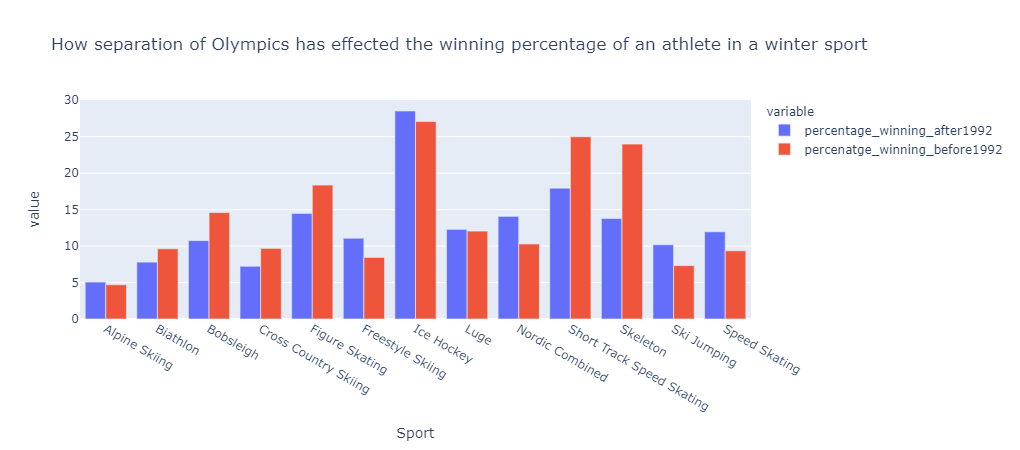

In [80]:
fig=px.bar(df,barmode="group",title="How separation of Olympics has effected the winning percentage of an athlete in a winter sport ")
fig.show()

The above graph depicts the changes in the winning rate of athletes in a particular winter sport. We can see that the percentage has gone down, this change can be attributed to the ever increasing number of participants being sent out over the years as well as to the fact that there are no new events being added.

## Conclusion

- The exploratory data analysis on Olympic dataset provides visual representation of performance of nations, players in Olympic from the year 1896 to 2012. From the above analyses, it is useful to identify  that the gap is being covered as the years go by, with there being no women participation in 1896 to having almost equal number of men and women athletes in 2016.

- Even though we found that winning percentage has been influenced for few winter sports after separation of Olympics, we cannot consider this to be significant as many other factors are to considered when dealing with winning of an athlete. We also found out that the number of events and participation has almost stagnated for the past few years where as there has been a steady increase in the participation rate during winter sessio alongwith the addition of the new events.

- We would like to use the existing data set to find out how height has varied over the years This would give us information about how gymnasts have coped up with increased tumbling, as it requires a higher angular momentum which can only be addressed if there is a decrease in height. The information we gained on how gymnasts have become leaner and more agile with decreased body fat composition and increased muscle mass doesn't fully justify the change which has occured in the physique of gymnasts over the years with increased complexity of the game and competition among the gymnasts. So by using the existing data set to find out how height has varied over the years would give us information about how gymnasts have coped up with increased tumbling, as it requires a higher angular momentum which can only be addressed if there is a decrease in height. This would allow us to gain a little more information about their build. In addition to this if we are able to find the Power/weight ratio data of the gymnasts from a reliable and authentic source, then it might be useful in explaining how the current gymnasts are able to perform such complex maneuvers.


### References

- Griffin (2018)  /120 years of Olympic History: athletes and results/ [Online]. Available at:(https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv) (Accessed: 25 September 2021)

- [Online]. Available at: (https://olympstats.com/) (Accessed: 26 September 2021)

- [Online]. Available at: (https://www.sports-reference.com ) (Accessed: 26 September 2021)

- Marco Giuseppe De Pinto (2018)  /Lets discover more about the Olympic Games!/ [Online]. Available at:(https://www.kaggle.com/marcogdepinto/let-s-discover-more-about-the-olympic-games/notebook ) (Accessed: 25 September 2021)

- [Online]. Available at: (https://olympics.com/) (Accessed: 3 October 2021)

- [Online]. Available at: (https://plotly.com/python/violin/) (Accessed: 12 October 2021)

- A.Bruce Frederick  /Gymnastics/ [Online]. Available at:(https://www.britannica.com/sports/gymnastics) (Accessed: 27 September 2021)

- [Online]. Available at: (https://en.wikipedia.org/wiki/Artistic_gymnastics) (Accessed: 28 September 2021)

- Katherine Kam  /What Your BMI Doesn't Tell You/ [Online]. Available at:(https://www.webmd.com/diet/features/bmi-drawbacks-and-other-measurements#1) (Accessed: 28 September 2021)

- Amée LaTour  /Why Men & Women Gymnasts Have Different Events/ [Online]. Available at:(https://www.bustle.com/articles/178020-why-are-mens-womens-gymnastics-events-different-look-to-the-skills-they-emphasize) (Accessed: 28 September 2021)